In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
%matplotlib inline

In [6]:
# setting the path for joining multiple files
files = os.path.join("C:\\Users\\petrillo\\Desktop\\dani\\HWSWBG2\\dataset\\yearly\\", "ds*.csv")

# list of merged files returned
files = glob.glob(files)

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files))
df = df[["Date","Town Hall (West)"]]
df["Town Hall (West)"] = pd.to_numeric(df["Town Hall (West)"],errors="coerce")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.set_index("Date")
print(df)

          Date  Town Hall (West)
0   2021-03-01              60.0
1   2021-03-01              59.0
2   2021-03-01              23.0
3   2021-03-01              12.0
4   2021-03-01              28.0
..         ...               ...
715 2021-11-30            1228.0
716 2021-11-30            1223.0
717 2021-11-30            1331.0
718 2021-11-30             661.0
719 2021-11-30             355.0

[9504 rows x 2 columns]


In [7]:
sm = df.groupby(by=['Date'], dropna=False).sum()
print(sm)

            Town Hall (West)
Date                        
2021-03-01           15891.0
2021-03-02           16615.0
2021-03-03           18456.0
2021-03-04           19170.0
2021-03-05           23838.0
...                      ...
2022-03-27           26395.0
2022-03-28           22602.0
2022-03-29           23542.0
2022-03-30           24925.0
2022-03-31           28783.0

[396 rows x 1 columns]


<AxesSubplot:xlabel='Date'>

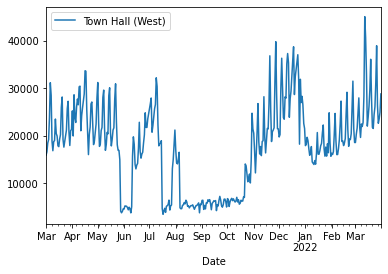

In [8]:
sm.plot(y='Town Hall (West)', kind = 'line')

In [11]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['Town Hall (West)'])

MissingDataError: exog contains inf or nans